#####This Notebook done by: `Salma Talat Shaheen 220210654 .`
***
###**`Fuzzy expert system :`** Develop and analyze a fuzzy expert system that models the operation of a service center of spare parts by :
- managing a service center.
-  recommending the number of spare parts.

based on factors like `mean delay`, `number of servers`, and `utilization factor.`

###**Install scikit - fuzzy library**

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


###**Import the main librarys**

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

###**Define linguistic variables then fuzzy sets for each variable**

In [3]:
# Step 1: Specify the problem and define linguistic variables
def define_variables():
    print("Defining linguistic variables and their fuzzy sets...")

    mean_delay = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'mean_delay')
    servers = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'servers')
    utilisation_factor = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'utilisation_factor')
    spares = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'spares')

    # Define fuzzy sets for each variable
    mean_delay['Very Short'] = fuzz.trimf(mean_delay.universe, [0, 0, 0.3])
    mean_delay['Short'] = fuzz.trimf(mean_delay.universe, [0.1, 0.3, 0.5])
    mean_delay['Medium'] = fuzz.trimf(mean_delay.universe, [0.4, 0.7, 1])

    servers['Small'] = fuzz.trimf(servers.universe, [0, 0, 0.35])
    servers['Medium'] = fuzz.trimf(servers.universe, [0.3, 0.5, 0.7])
    servers['Large'] = fuzz.trimf(servers.universe, [0.6, 1, 1])

    utilisation_factor['Low'] = fuzz.trimf(utilisation_factor.universe, [0, 0, 0.6])
    utilisation_factor['Medium'] = fuzz.trimf(utilisation_factor.universe, [0.4, 0.6, 0.8])
    utilisation_factor['High'] = fuzz.trimf(utilisation_factor.universe, [0.6, 1, 1])

    spares['Very Small'] = fuzz.trimf(spares.universe, [0, 0, 0.3])
    spares['Small'] = fuzz.trimf(spares.universe, [0, 0.2, 0.4])
    spares['Rather Small'] = fuzz.trimf(spares.universe, [0.25, 0.35, 0.45])
    spares['Medium'] = fuzz.trimf(spares.universe, [0.3, 0.5, 0.7])
    spares['Rather Large'] = fuzz.trimf(spares.universe, [0.55, 0.65, 0.75])
    spares['Large'] = fuzz.trimf(spares.universe, [0.6, 0.8, 1])
    spares['Very Large'] = fuzz.trimf(spares.universe, [0.7, 1, 1])

    print("Linguistic variables and fuzzy sets defined successfully.")
    return mean_delay, servers, utilisation_factor, spares

###**Add the remaining rules in the `Rule Bas 1` (rule10 , rule11 , rule12)**

In [4]:
# Step 2 & 3: Construct fuzzy rules
def construct_rules(mean_delay, servers, utilisation_factor, spares):
    print("Constructing fuzzy rules...")

    # Existing rules
    rule1 = ctrl.Rule(utilisation_factor['Low'], spares['Small'])
    rule2 = ctrl.Rule(utilisation_factor['Medium'], spares['Medium'])
    rule3 = ctrl.Rule(utilisation_factor['High'], spares['Large'])

    rule4 = ctrl.Rule(mean_delay['Very Short'] & servers['Small'], spares['Very Large'])
    rule5 = ctrl.Rule(mean_delay['Short'] & servers['Small'], spares['Large'])
    rule6 = ctrl.Rule(mean_delay['Medium'] & servers['Small'], spares['Medium'])

    rule7 = ctrl.Rule(mean_delay['Very Short'] & servers['Medium'], spares['Rather Large'])
    rule8 = ctrl.Rule(mean_delay['Short'] & servers['Medium'], spares['Rather Small'])
    rule9 = ctrl.Rule(mean_delay['Medium'] & servers['Medium'], spares['Small'])

    # New rules
    rule10 = ctrl.Rule(mean_delay['Very Short'] & servers['Large'], spares['Medium'])
    rule11 = ctrl.Rule(mean_delay['Short'] & servers['Large'], spares['Small'])
    rule12 = ctrl.Rule(mean_delay['Medium'] & servers['Large'], spares['Very Small'])

    print("Fuzzy rules constructed successfully.")
    return [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]

###**Encode fuzzy sets and rules into the expert system**

In [5]:
# Step 4: Encode fuzzy sets and rules into the expert system
def create_fuzzy_system(rules):
    print("Creating the fuzzy expert system...")
    spares_ctrl = ctrl.ControlSystem(rules)
    spares_sim = ctrl.ControlSystemSimulation(spares_ctrl)
    print("Fuzzy expert system created successfully.")
    return spares_sim

###**Evaluate the fuzzy expert system**

In [6]:
# Step 5: Evaluate the fuzzy expert system
def evaluate_system(spares_sim):
    print("Evaluating the fuzzy expert system...")

    mean_delay_input = float(input("Enter mean delay (0 to 1): "))
    servers_input = float(input("Enter number of servers (0 to 1): "))
    utilisation_factor_input = float(input("Enter utilisation factor (0 to 1): "))

    spares_sim.input['mean_delay'] = mean_delay_input
    spares_sim.input['servers'] = servers_input
    spares_sim.input['utilisation_factor'] = utilisation_factor_input

    spares_sim.compute()
    print(f"Recommended number of spares: {spares_sim.output['spares']:.2f}")

    return spares_sim

###**Visualizing System Performance Metrics and Spare Components**

In [7]:
def visualize_system(mean_delay, servers, utilisation_factor, spares, spares_sim):
    print("Visualizing the fuzzy system...")

    mean_delay.view()
    servers.view()
    utilisation_factor.view()

    spares.view(sim=spares_sim)

###**Run and execute the Fuzzy Expert System**

Building a Fuzzy Expert System for Service Center Management...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Fuzzy rules constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
Evaluating the fuzzy expert system...
Enter mean delay (0 to 1): .5
Enter number of servers (0 to 1): .5
Enter utilisation factor (0 to 1): .5
Recommended number of spares: 0.37
Visualizing the fuzzy system...
Fuzzy Expert System completed executing.


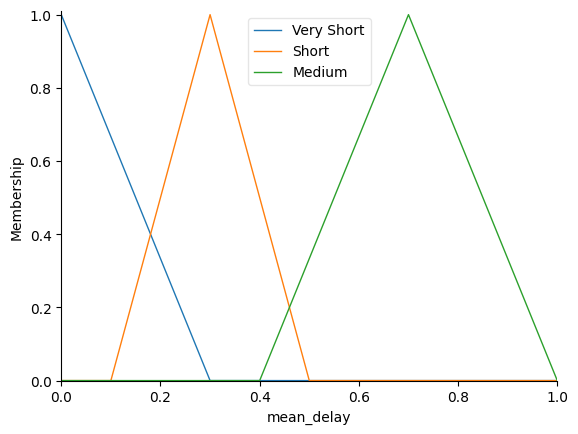

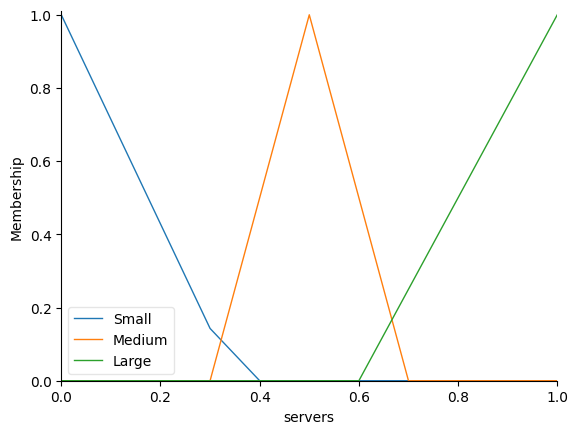

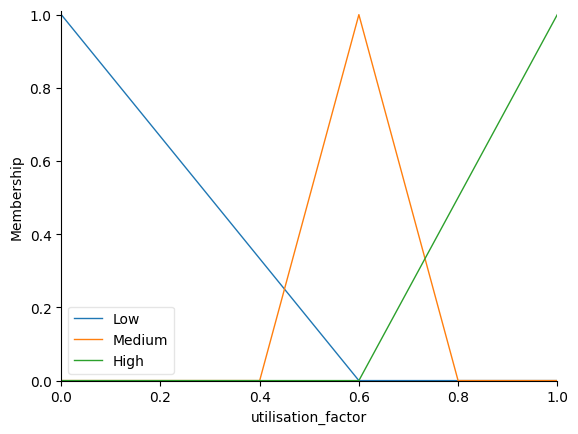

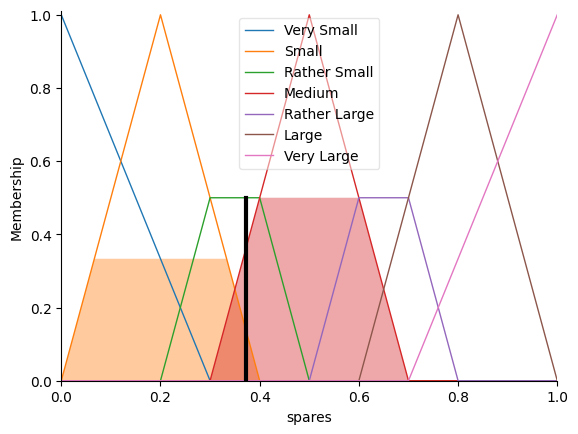

In [8]:
if __name__ == "__main__":
    print("Building a Fuzzy Expert System for Service Center Management...")

    mean_delay, servers, utilisation_factor, spares = define_variables()

    rules = construct_rules(mean_delay, servers, utilisation_factor, spares)

    spares_sim = create_fuzzy_system(rules)
    spares_sim = evaluate_system(spares_sim)

    visualize_system(mean_delay, servers, utilisation_factor, spares, spares_sim)

    print("Fuzzy Expert System completed executing.")

###**Generate 3D Figures of the three rule sets**

- `Mean Delay, Servers, and Spares :`
This plot visualizes the relationship between three input parameters **mean delay, number of servers,** and **utilization factor—and** the output, which is the **number of spares,** in a fuzzy system.

In [9]:
# Generate 3D surface plot
def generate_3d_plot(mean_delay, servers, utilisation_factor, spares, spares_sim):
    """ Create mesh grids for the input variables"""
    mean_delay_vals = np.arange(0, 1.1, 0.1)
    servers_vals = np.arange(0, 1.1, 0.1)
    utilisation_factor_vals = np.arange(0, 1.1, 0.1)
    mean_delay_grid, servers_grid, utilisation_factor_grid = np.meshgrid(mean_delay_vals, servers_vals, utilisation_factor_vals)

    """ 3D grid for plotting the output spares """
    spares_grid = np.zeros(mean_delay_grid.shape)

    # Calculate the output for each combination of inputs
    for i in range(mean_delay_grid.shape[0]):
        for j in range(mean_delay_grid.shape[1]):
            for k in range(mean_delay_grid.shape[2]):
                spares_sim.input['mean_delay'] = mean_delay_grid[i, j, k]
                spares_sim.input['servers'] = servers_grid[i, j, k]
                spares_sim.input['utilisation_factor'] = utilisation_factor_grid[i, j, k]
                spares_sim.compute()
                spares_grid[i, j, k] = spares_sim.output['spares']

    """ the 3D surface """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(mean_delay_grid[:, :, 0], servers_grid[:, :, 0], spares_grid[:, :, 0], cmap='viridis')

    ax.set_xlabel('Mean Delay')
    ax.set_ylabel('Servers')
    ax.set_zlabel('Spares')
    ax.set_title('3D Surface Plot for Fuzzy System')

    plt.show()


- `Mean Delay and Utilisation Factor :` visualizes the impact of two input parameters **mean delay** and **utilization factor** on the number of spares in a fuzzy system.

In [10]:
# Generate 3D surface plot for mean_delay and utilisation_factor only
def generate_3d_plot_case2(mean_delay, utilisation_factor, spares_sim):
    mean_delay_vals = np.arange(0, 1.1, 0.1)
    utilisation_factor_vals = np.arange(0, 1.1, 0.1)
    mean_delay_grid, utilisation_factor_grid = np.meshgrid(mean_delay_vals, utilisation_factor_vals)
    spares_grid = np.zeros(mean_delay_grid.shape)

    for i in range(mean_delay_grid.shape[0]):
        for j in range(mean_delay_grid.shape[1]):
            spares_sim.input['mean_delay'] = mean_delay_grid[i, j]
            spares_sim.input['utilisation_factor'] = utilisation_factor_grid[i, j]
            spares_sim.compute()
            spares_grid[i, j] = spares_sim.output['spares']

    """ the 3D surface """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(mean_delay_grid, utilisation_factor_grid, spares_grid, cmap='viridis')

    ax.set_xlabel('Mean Delay')
    ax.set_ylabel('Utilisation Factor')
    ax.set_zlabel('Spares')
    ax.set_title('3D Surface Plot for Mean Delay and Utilisation Factor')

    plt.show()

Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Fuzzy rules constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.


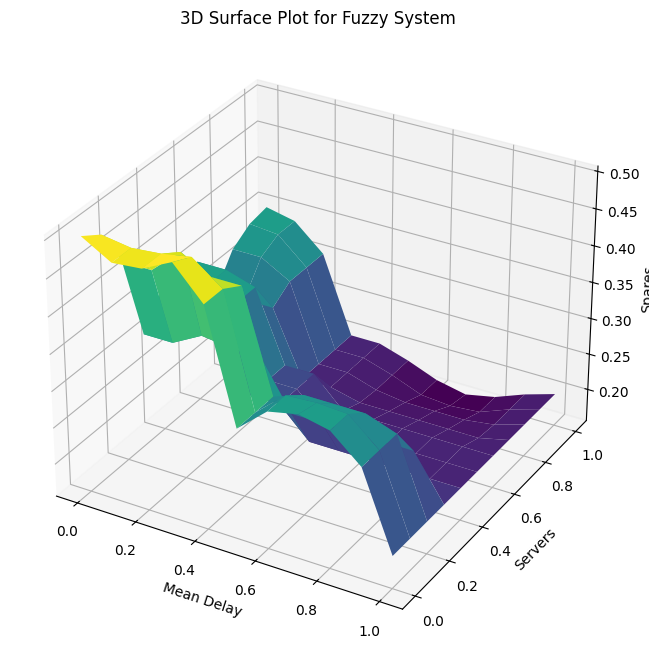

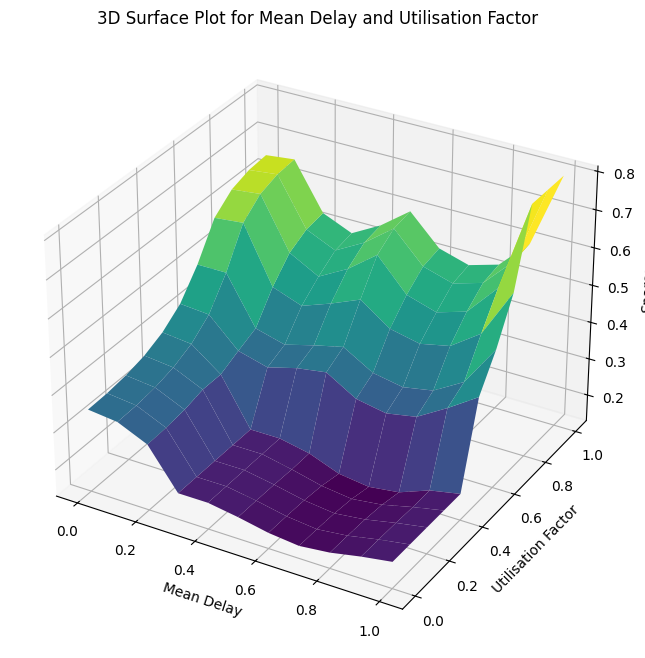

In [11]:
# Main execution
if __name__ == "__main__":
    """ The linguistic variables and fuzzy rules"""
    mean_delay, servers, utilisation_factor, spares = define_variables()
    rules = construct_rules(mean_delay, servers, utilisation_factor, spares)
    spares_sim = create_fuzzy_system(rules)

    """3D surface plot for all inputs"""
    generate_3d_plot(mean_delay, servers, utilisation_factor, spares, spares_sim)

    # Generate 3D surface plot for mean_delay and utilisation_factor only
    generate_3d_plot_case2(mean_delay, utilisation_factor, spares_sim)

###**Test the system using 3 different cases.**

In [12]:
def test_cases(spares_sim):
    cases = [
        {"mean_delay": 0.2, "servers": 0.2, "utilisation_factor": 0.3},
        {"mean_delay": 0.5, "servers": 0.5, "utilisation_factor": 0.5},
        {"mean_delay": 0.8, "servers": 0.8, "utilisation_factor": 0.9},
    ]

    for i, case in enumerate(cases, start=1):
        spares_sim.input['mean_delay'] = case['mean_delay']
        spares_sim.input['servers'] = case['servers']
        spares_sim.input['utilisation_factor'] = case['utilisation_factor']
        spares_sim.compute()
        print(f"Case {i}: {case}")
        print(f"Recommended number of spares: {spares_sim.output['spares']:.2f}\n")

if __name__ == "__main__":
    print("Building a Fuzzy Expert System for Service Center Management...")
    mean_delay, servers, utilisation_factor, spares = define_variables()
    rules = construct_rules(mean_delay, servers, utilisation_factor, spares)
    spares_sim = create_fuzzy_system(rules)

    """Run test cases and print results"""
    test_cases(spares_sim)

Building a Fuzzy Expert System for Service Center Management...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Fuzzy rules constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
Case 1: {'mean_delay': 0.2, 'servers': 0.2, 'utilisation_factor': 0.3}
Recommended number of spares: 0.51

Case 2: {'mean_delay': 0.5, 'servers': 0.5, 'utilisation_factor': 0.5}
Recommended number of spares: 0.37

Case 3: {'mean_delay': 0.8, 'servers': 0.8, 'utilisation_factor': 0.9}
Recommended number of spares: 0.54



### `Explanation of Uncertainty in the Three Cases:`

---

In the code, the `defuzzification - Mamdani` process occurs automatically when **spares_sim.compute()** is called. After fuzzy inference is applied to the inputs according to the rules, the fuzzy results are converted into a precise numerical value representing the output, such as the "recommended number of spares."



#### 1. **Case 1:**

The inputs are all **low**:
- `mean_delay = 0.2`
- `servers = 0.2`
- `utilisation_factor = 0.3`

The uncertainty stems from the ambiguity in definitions such as "Very Short" or "Small." The imprecise values cause overlaps between these categories.

The **output (0.51)** represents this overlap, falling between "Very Small" and "Small," suggesting that **the exact number of spares is not clearly defined.**

---

#### 2. **Case 2:**

The inputs are all **medium**:
- `mean_delay = 0.5`
- `servers = 0.5`
- `utilisation_factor = 0.5`

The uncertainty stems from the ambiguity in definitions such as "Medium." The mid-range values cause overlaps between adjacent categories.

The **output (0.37)** represents this overlap, falling between "Medium" and neighboring categories, suggesting that **the exact number of spares is not clearly defined.**

---

#### 3. **Case 3:**

The inputs are all **high**:
- `mean_delay = 0.8`
- `servers = 0.8`
- `utilisation_factor = 0.9`

The uncertainty stems from the ambiguity in definitions such as "High" or "Large." The high values cause overlaps between these categories and adjacent ones.

The **output (0.54)** represents this overlap, falling between "High" and "Large," suggesting that **the exact number of spares is not clearly defined.**

***
###**Thank you !**